In this notebook we calculate all the diagrams with contributions to LFVHD in the MLRSM using the UFO model of [Roitgrund2016](https://www.sciencedirect.com/science/article/pii/S0010465515004476?via%3Dihub)

In [2]:
from UFOexplorer import UFOModelExplorer, ProjM, ProjP
from sympy import init_printing, factor, simplify, sympify
init_printing()

In [3]:
ufo_directory ='C:/Users/moise/OneDrive/Escritorio/LRSM-with-Spheno/UFOmodel/MLRSM_UFO_neutrino_mix'
UFOModel = UFOModelExplorer(ufo_directory=ufo_directory)
UFOModel.load_model()


Loading particles from C:/Users/moise/OneDrive/Escritorio/LRSM-with-Spheno/UFOmodel/MLRSM_UFO_neutrino_mix\particles.py...
Namespace keys after executing C:/Users/moise/OneDrive/Escritorio/LRSM-with-Spheno/UFOmodel/MLRSM_UFO_neutrino_mix\particles.py: ['__name__', '__file__', '__package__', '__builtins__', 'division', 'all_particles', 'Particle', 'Param', 'Prop', 'a', 'Z', 'W__plus__', 'W__minus__', 'g', 'W2__plus__', 'W2__minus__', 'Z2', 'ghG', 'ghG__tilde__', 'e__minus__', 'e__plus__', 'mu__minus__', 'mu__plus__', 'ta__minus__', 'ta__plus__', 'u', 'u__tilde__', 'c', 'c__tilde__', 't', 't__tilde__', 'd', 'd__tilde__', 's', 's__tilde__', 'b', 'b__tilde__', 'N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'H', 'H01', 'H02', 'H03', 'G01', 'G02', 'GL__plus__', 'GL__minus__', 'GR__plus__', 'GR__minus__', 'HP1', 'HM1', 'HP2', 'HM2', 'HL__plus____plus__', 'HL__minus____minus__', 'HR__plus____plus__', 'HR__minus____minus__', 'A01', 'A02']
Loaded 54 objects for particles.
Objects in all_particles: [a, Z, 

In [4]:
UFOModel.summarize_model()


Model Summary:
Particles: 54
Parameters: 1377
Couplings: 1512
Lorentz Structures: 23
Vertices: 1638
Decays: 29


## Dictinary with all parameters classified

In [5]:
from UFOexplorer import preprocess_expression

In [6]:
skip_parameter_lepton_mixingL = [
    param.name for param in UFOModel.parameters if param.name[0:2] == 'KL'
]
print('Number of lements in KL: ', len(skip_parameter_lepton_mixingL))
skip_parameter_lepton_mixingR = [
    param.name for param in UFOModel.parameters if param.name[0:2] == 'KR'
]
print('Number of lements in KR: ', len(skip_parameter_lepton_mixingR))
skip_parameter_lepton_mixing = skip_parameter_lepton_mixingL + skip_parameter_lepton_mixingR


Number of lements in KL:  18
Number of lements in KR:  18


In [7]:
skip_parameter_lepton_mixing

['KL1x1',
 'KL1x2',
 'KL1x3',
 'KL2x1',
 'KL2x2',
 'KL2x3',
 'KL3x1',
 'KL3x2',
 'KL3x3',
 'KL4x1',
 'KL4x2',
 'KL4x3',
 'KL5x1',
 'KL5x2',
 'KL5x3',
 'KL6x1',
 'KL6x2',
 'KL6x3',
 'KR1x1',
 'KR1x2',
 'KR1x3',
 'KR2x1',
 'KR2x2',
 'KR2x3',
 'KR3x1',
 'KR3x2',
 'KR3x3',
 'KR4x1',
 'KR4x2',
 'KR4x3',
 'KR5x1',
 'KR5x2',
 'KR5x3',
 'KR6x1',
 'KR6x2',
 'KR6x3']

In [8]:
parameter_classified = UFOModel.classify_parameters()

# Initialize dictionaries
sympy_lepton_mixing_matrix_entries = {}
sympy_parameters_internal = {}
sympy_parameters_external = {}
sympy_mass_internal = {}
sympy_mass_external = {}

# Debugging: Print the entire parameter_classified dictionary
print("Classified Parameters:", parameter_classified)

# Process parameters by nature
for nature, parameters in parameter_classified.items():
    print(f"Nature: {nature}")  # Debugging output
    for param in parameters:
        try:
            # Debugging: Check parameter details
            print(f"Processing parameter: {param.name}")
            print(f"Nature: {nature}, Value: {param.value}")

            # Preprocess and sympify the value if it's not already a float
            if isinstance(param.value, float):
                value = param.value
            else:
                value = preprocess_expression(param.value)
                value = sympify(value)

            # Categorize parameters
            if nature == 'internal':
                if param.name in skip_parameter_lepton_mixing:
                    sympy_lepton_mixing_matrix_entries[sympify(param.name)] = value
                elif param.name[0] == 'M':  # Assuming 'M' indicates mass
                    sympy_mass_internal[sympify(param.name)] = value
                else:
                    sympy_parameters_internal[sympify(param.name)] = value
            elif nature == 'external':
                print(f"External parameter detected: {param.name}")  # Debugging output
                if param.name[0] == 'M':  # Assuming 'M' indicates mass
                    sympy_mass_external[sympify(param.name)] = value
                else:
                    sympy_parameters_external[sympify(param.name)] = value
                print(f"Added to sympy_parameters_external: {param.name} = {value}")  # Debugging output
            else:
                print(f"Unknown nature: {nature} for parameter {param.name}")  # Debugging output
        except Exception as e:
            print(f"Error processing parameter {param.name}: {e}")

# Debugging output
print("Internal Mass Parameters:", sympy_mass_internal)
print("External Mass Parameters:", sympy_mass_external)
print("Internal Parameters:", sympy_parameters_internal)
print("External Parameters:", sympy_parameters_external)
print("Lepton Mixing Matrix Entries:", sympy_lepton_mixing_matrix_entries)

Classified Parameters: {'internal': [ZERO, aEW, sw2, cw, gs, vev, MH02, MH03, MA02, yML1x1, yML2x2, yML3x3, yNL1x1, yNL2x2, yNL3x3, yNL4x4, yNL5x5, yNL6x6, yMU1x1, yMU2x2, yMU3x3, yDO1x1, yDO2x2, yDO3x3, CKML1x1, CKML1x2, CKML1x3, CKML2x1, CKML2x2, CKML2x3, CKML3x1, CKML3x2, CKML3x3, Wl1x1, Wl2x2, Wl3x3, WU1x1, WU2x2, WU3x3, WD1x1, WD2x2, WD3x3, KL1x1, KL1x2, KL1x3, KL2x1, KL2x2, KL2x3, KL3x1, KL3x2, KL3x3, KL4x1, KL4x2, KL4x3, KL5x1, KL5x2, KL5x3, KL6x1, KL6x2, KL6x3, KR1x1, KR1x2, KR1x3, KR2x1, KR2x2, KR2x3, KR3x1, KR3x2, KR3x3, KR4x1, KR4x2, KR4x3, KR5x1, KR5x2, KR5x3, KR6x1, KR6x2, KR6x3, CKMR1x1, CKMR1x2, CKMR1x3, CKMR2x1, CKMR2x2, CKMR2x3, CKMR3x1, CKMR3x2, CKMR3x3, sw, ee, k2, eps, sphi, sxi, g1, gw, cphi, cxi, MA01, MH, MH01, MHP1, MHP2, MHPPL, MHPPR, MW2, MZ2, I1a11, I1a12, I1a13, I1a21, I1a22, I1a23, I1a31, I1a32, I1a33, I10a11, I10a12, I10a13, I10a21, I10a22, I10a23, I10a31, I10a32, I10a33, I11a11, I11a12, I11a13, I11a21, I11a22, I11a23, I11a31, I11a32, I11a33, I12a11, I12a1

' = '

' = '

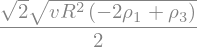

' = '

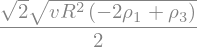

' = '

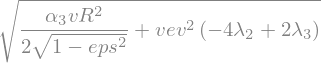

' = '

' = '

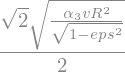

' = '

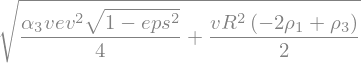

' = '

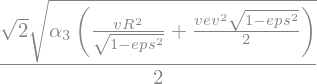

' = '

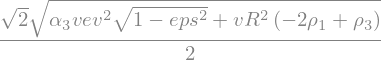

' = '

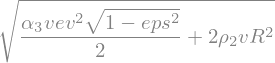

' = '

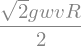

' = '

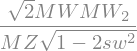

In [9]:
for param, param_sympy in sympy_mass_internal.items():
    display(param, ' = ', param_sympy)

In [10]:
for param, param_sympy in sympy_parameters_internal.items():
    print(param, ' = ', param_sympy)

ZERO  =  0.0
aEW  =  1/aEWM1
sw2  =  -MW**2/MZ**2 + 1
cw  =  MW/MZ
gs  =  2*sqrt(pi)*sqrt(aS)
vev  =  2**(3/4)/(2*sqrt(Gf))
yML1x1  =  Me
yML2x2  =  Mmu
yML3x3  =  Mta
yNL1x1  =  MN1
yNL2x2  =  MN2
yNL3x3  =  MN3
yNL4x4  =  MN4
yNL5x5  =  MN5
yNL6x6  =  MN6
yMU1x1  =  MU
yMU2x2  =  MC
yMU3x3  =  MT
yDO1x1  =  MD
yDO2x2  =  MS
yDO3x3  =  MB
CKML1x1  =  sqrt(1 - s12**2)*sqrt(1 - s13**2)
CKML1x2  =  s12*sqrt(1 - s13**2)
CKML1x3  =  s13
CKML2x1  =  -s12*sqrt(1 - s23**2) - s13*s23*sqrt(1 - s12**2)
CKML2x2  =  -s12*s13*s23 + sqrt(1 - s12**2)*sqrt(1 - s23**2)
CKML2x3  =  s23*sqrt(1 - s13**2)
CKML3x1  =  s12*s23 - s13*sqrt(1 - s12**2)*sqrt(1 - s23**2)
CKML3x2  =  -s12*s13*sqrt(1 - s23**2) - s23*sqrt(1 - s12**2)
CKML3x3  =  sqrt(1 - s13**2)*sqrt(1 - s23**2)
Wl1x1  =  Wl11
Wl2x2  =  Wl22
Wl3x3  =  Wl33
WU1x1  =  WU11
WU2x2  =  WU22
WU3x3  =  WU33
WD1x1  =  WD11
WD2x2  =  WD22
WD3x3  =  WD33
CKMR1x1  =  CKML1x1*WD1x1*WU1x1
CKMR1x2  =  CKML1x2*WD2x2*WU1x1
CKMR1x3  =  CKML1x3*WD3x3*WU1x1
CKMR2x1  =

In [11]:
for param, param_sympy in sympy_parameters_external.items():
    print(param, ' = ', param_sympy)

s12  =  0.221
s23  =  0.041
s13  =  0.0035
lambda1  =  0.118
lambda2  =  0.2
lambda3  =  -0.234
rho1  =  0.5
rho2  =  0.05
rho3  =  1.25
rho4  =  0.125
alpha1  =  0.5
alpha2  =  0.5
alpha3  =  0.5
VR63  =  0.0031622776601683794
aEWM1  =  127.9
Gf  =  1.16637e-05
aS  =  0.1184
k1  =  227.91
vR  =  2543.2
WZ  =  2.4952
WW  =  2.08
WT  =  1.50833649
WN4  =  1.5
WN5  =  1.5
WN6  =  1.5
WH  =  0.0057
WH01  =  0.00575308848
WH02  =  0.00575308848
WH03  =  0.00575308848
WHP1  =  0.006
WHP2  =  0.006
WHPPL  =  0.007
WHPPR  =  0.007
WA01  =  0.006
WA02  =  0.006


In [12]:
for param, param_sympy in sympy_lepton_mixing_matrix_entries.items():
    print(param, ' = ', param_sympy)

KL1x1  =  VL11
KL1x2  =  VL12
KL1x3  =  VL13
KL2x1  =  VL21
KL2x2  =  VL22
KL2x3  =  VL23
KL3x1  =  VL31
KL3x2  =  VL32
KL3x3  =  VL33
KL4x1  =  VL41
KL4x2  =  VL42
KL4x3  =  VL43
KL5x1  =  VL51
KL5x2  =  VL52
KL5x3  =  VL53
KL6x1  =  VL61
KL6x2  =  VL62
KL6x3  =  VL63
KR1x1  =  VR11
KR1x2  =  VR12
KR1x3  =  VR13
KR2x1  =  VR21
KR2x2  =  VR22
KR2x3  =  VR23
KR3x1  =  VR31
KR3x2  =  VR32
KR3x3  =  VR33
KR4x1  =  VR41
KR4x2  =  VR42
KR4x3  =  VR43
KR5x1  =  VR51
KR5x2  =  VR52
KR5x3  =  VR53
KR6x1  =  VR61
KR6x2  =  VR62
KR6x3  =  VR63


In [13]:
import mpmath as mp
from neutrino_mass_mpmath import pmns_matrix
from diagonalization_M_full import diagonalize_and_reconstruct
from compute_seesaw_approximations import compute_MD_seesaw_I_mlrsm, M_full_typeI_seesaw

In [14]:

mp.dps = 200  # Adjust precision to 150 decimal places
# Define parameters
m1 = mp.mpf('1e-12')  # Lightest neutrino mass (GeV)
delta_m21_sq = mp.mpf('7.49e-5') * mp.mpf('1e-18')  # Solar mass-squared diff (GeV^2)
delta_m31_sq = mp.mpf('2.534e-3') * mp.mpf('1e-18')  # Atmospheric mass-squared diff (GeV^2)

m2 = mp.sqrt(m1**2 + delta_m21_sq) # Second lightest neutrino mass
m3 = mp.sqrt(m1**2 + delta_m31_sq) # Third lightest neutrino mass
v_L = mp.mpf('1e-2')  # Left-handed triplet VEV
v_R = mp.mpf('1e4')  # Right-handed triplet VEV

m_nu_diag = mp.matrix([[m1, 0, 0], [0, m2, 0], [0, 0, m3]])  # Light neutrino masses

M_R_diag = mp.matrix([[1000, 0, 0], [0, 2000, 0], [0, 0, 3000]])  # Heavy neutrino masses
U_PMNS = pmns_matrix()  # PMNS mixing matrix
W_R = mp.eye(3)  # Assume M_R is already diagonal

# Compute M_D
M_D = compute_MD_seesaw_I_mlrsm(m_nu_diag, M_R_diag, U_PMNS, W_R)
#print("M_D (Dirac mass matrix):")
#print(mp.nprint(mp.chop(M_D)))
#print('M_D norm:', mp.norm(M_D, p=2))


# Compute M_full for Type I seesaw
M_full_I = M_full_typeI_seesaw(m_nu_diag, M_R_diag, U_PMNS, W_R)
print("\nM_full (Type I):")
print(mp.nprint(mp.chop(M_full_I, tol=1e-15)))

# Diagonalize M_full for Type I
#D_I, V_I = diagonalize_M_full(M_full_I)
D_I, V_I, M_reconstructed_I, error_I = diagonalize_and_reconstruct(M_full_I)

print('V_I = ')
print(mp.nprint(mp.chop(V_I, tol=1e-15)))


M_full (Type I):
[                0.0                   0.0                   0.0  (0.0 + 5.11395e-5j)   (0.0 + 5.94399e-5j)   (0.0 - 7.94314e-6j)]
[                0.0                   0.0                   0.0    (0.0 + 2.972e-5j)  (0.0 + 0.000213075j)   (0.0 + 0.00013792j)]
[                0.0                   0.0                   0.0  (0.0 - 2.64771e-6j)   (0.0 + 9.19467e-5j)  (0.0 + 0.000253965j)]
[(0.0 + 5.11395e-5j)     (0.0 + 2.972e-5j)   (0.0 - 2.64771e-6j)               1000.0                   0.0                   0.0]
[(0.0 + 5.94399e-5j)  (0.0 + 0.000213075j)   (0.0 + 9.19467e-5j)                  0.0                2000.0                   0.0]
[(0.0 - 7.94314e-6j)   (0.0 + 0.00013792j)  (0.0 + 0.000253965j)                  0.0                   0.0                3000.0]
None

Eigenvalues:
[1.0e-12          0.0          0.0     0.0     0.0     0.0]
[    0.0  8.71206e-12          0.0     0.0     0.0     0.0]
[    0.0          0.0  5.03488e-11     0.0     0.0     0.

In [15]:
from neutrino_mass_mpmath import KL_KR_from_V_dict_sympy, eigenvals_dict_sympy

In [16]:
mp.nprint(mp.chop(V_I))

[          1.57434e-9            2.73359e-8            -0.198386             0.402952             0.389648  (0.0 + 5.03362e-8j)]
[   (0.0 + 0.594604j)  (0.0 + 2.71403e-15j)  (0.0 + 1.63739e-8j)  (0.0 + 2.64002e-8j)  (0.0 - 1.65625e-8j)         -2.99318e-16]
[(0.0 + 5.42806e-15j)     (0.0 - 0.594604j)  (0.0 - 5.46338e-9j)  (0.0 + 2.21984e-8j)  (0.0 - 6.74526e-8j)         -1.03593e-14]
[         -3.04077e-8            1.76716e-8            -0.489338            -0.326101            0.0880933  (0.0 - 1.57434e-9j)]
[         -1.76716e-8            6.33477e-8             0.273396            -0.291275             0.440417  (0.0 + 2.73359e-8j)]
[(0.0 + 8.97953e-16j)  (0.0 - 1.55389e-14j)  (0.0 + 2.92985e-9j)  (0.0 - 2.15845e-8j)  (0.0 - 5.29999e-8j)             0.594604]


In [17]:
KL_sympy, KR_sympy = KL_KR_from_V_dict_sympy(V_I)
KL_sympy, KR_sympy

({KL1x1: mpf('0.0000000015743399504487305556401015261545440491731021367782265'),
  KL1x2: mpc(real='0.0', imag='-0.59460355750136203985579012808436915188378849731997239'),
  KL1x3: mpf('0.0'),
  KL2x1: mpf('0.000000027335911363977479599044845699972426796016878521420274'),
  KL2x2: mpf('0.0'),
  KL2x3: mpc(real='0.0', imag='0.59460355750135881663760602879185552447258914461229655'),
  KL3x1: mpf('-0.19838605477553845528207294343968043419369874438473479'),
  KL3x2: mpc(real='0.0', imag='-0.000000016373893239002926983966842184206624131916928218124524'),
  KL3x3: mpc(real='0.0', imag='0.0000000054633783482961023946346584048307284427791221477829095'),
  KL4x1: mpf('0.40295243111112112315425323105870826979795552786340009'),
  KL4x2: mpc(real='0.0', imag='-0.000000026400200699116107692102820213621879656772939284276404'),
  KL4x3: mpc(real='0.0', imag='-0.000000022198369749603861873342817200708217786282119377468363'),
  KL5x1: mpf('0.38964817736711765331715854894277593198732303540793846'),
  KL

In [18]:
eigenvals = [D_I[i,i] for i in range(6)]
eigenvals

[mpc(real='0.0000000000010000000000000008670172385480398972981898266212082802', imag='0.0'),
 mpc(real='0.0000000000087120606058498417021350988617245928988778099790586551', imag='0.0'),
 mpc(real='0.000000000050348783500697506528850440166650388537119488620842482', imag='0.0'),
 mpc(real='999.99999999999649446773057536516305678007973738478461', imag='0.0'),
 mpc(real='1999.9999999999713057945284350167555203489251764994905', imag='0.0'),
 mpc(real='2999.999999999972138893634442268983420093418671236988', imag='0.0')]

In [19]:
MNs_vals = eigenvals_dict_sympy(eigenvalues=eigenvals)
MNs_vals

{MN1: mpf('0.0000000000010000000000000008670172385480398972981898266212082802'),
 MN2: mpf('0.0000000000087120606058498417021350988617245928988778099790586551'),
 MN3: mpf('0.000000000050348783500697506528850440166650388537119488620842482'),
 MN4: mpf('999.99999999999649446773057536516305678007973738478461'),
 MN5: mpf('1999.9999999999713057945284350167555203489251764994905'),
 MN6: mpf('2999.999999999972138893634442268983420093418671236988')}

# Calculating the lepton Flavor violating Higgs decays

We start considering the LFVHD. As we know in the Manifest Left-Right Symmetric model,  we have 4 neutral scalars $H_r^0$ with $r=0,1,2,3$, and $H_0^0 = h^{\text{SM}}$, there are two singly charged Higgs $H_{1,2}^\pm$ y two doubly charged Higgs $H_{L,R}^{\pm \pm}$, all this scalars represents 12 degrees of freedom of the model. Also we have two neutral vector bosons $Z$ and $Z_2$, also, we have two charged vector bosons $W^\pm$ and $W_2^\pm$.Adittionally, we have to neutral $G_{1,2}^0$ and two charged $G_{L,R}^\pm$ goldstone bosons, associated to the corresponding vector neutral and charged bosons.

With our UFOModelExplorer class we are able to explore the feynman rules of the MLRSM UFO files and classify them as we did it.

In [20]:
import sys
sys.path.append('C:/Users/moise/OneDrive/Escritorio/LRSM-with-Spheno/UFOmodel/LFVXD')


In [21]:
from sympy import Matrix
from LFVXD.PaVe2 import Δe as div
from LFVXD.PaVe2 import D

# Higgs diagrams

## One fermion in the loop

### Triangle FSS

In [22]:
from construct_lfvhd_diagrams import construct_triangle_diagram_FSS

#### Triangle $N_i H_1^+ H_1^-$

In [23]:
neutrinos = [ptc for ptc in UFOModel.particles if ptc.spin==2 and ptc.charge==0]

triangles_Ni_HP1_HM1 = [
    construct_triangle_diagram_FSS(    
        loop_fermion=nu.name,
        scalar1='HP1',
        scalar2='HM1',
        external_scalars=['H'],
        external_fermions=['mu-', 'ta+'],
        ufo_model=UFOModel
    )
    for nu in neutrinos
]
print(triangles_Ni_HP1_HM1)


External scalar: H
External fermions: ['mu-', 'ta+']
Loop fermion: N1
Scalars in loop: HP1, HM1
Coefficient vertex H-HP1-HM1: 
 -I*(2*alpha1*k1**2 + 2*alpha1*k2**2 + 8*alpha2*k1*k2 + alpha3*k1**2 + alpha3*k2**2)/(2*vev)
Coefficient vertex HP1-mu--N1: 
 {'ProjP': I*I43a12/(2*vR) + I*I44a12/(2*vR)}
Coefficient vertex HM1-ta+-N1: 
 {'ProjM': I*I51a13/(2*vR) + I*I52a13/(2*vR)}
External scalar: H
External fermions: ['mu-', 'ta+']
Loop fermion: N2
Scalars in loop: HP1, HM1
Coefficient vertex H-HP1-HM1: 
 -I*(2*alpha1*k1**2 + 2*alpha1*k2**2 + 8*alpha2*k1*k2 + alpha3*k1**2 + alpha3*k2**2)/(2*vev)
Coefficient vertex HP1-mu--N2: 
 {'ProjP': I*I43a22/(2*vR) + I*I44a22/(2*vR)}
Coefficient vertex HM1-ta+-N2: 
 {'ProjM': I*I51a23/(2*vR) + I*I52a23/(2*vR)}
External scalar: H
External fermions: ['mu-', 'ta+']
Loop fermion: N3
Scalars in loop: HP1, HM1
Coefficient vertex H-HP1-HM1: 
 -I*(2*alpha1*k1**2 + 2*alpha1*k2**2 + 8*alpha2*k1*k2 + alpha3*k1**2 + alpha3*k2**2)/(2*vev)
Coefficient vertex HP1-mu--N

In [24]:
# Collect all AL expressions
AL_expressions = [triangle.AL() for triangle in triangles_Ni_HP1_HM1]

# Batch substitute neutrino parameters
AL_matrix = Matrix(AL_expressions)
AL_substituted_matrix = AL_matrix.subs(sympy_parameters_internal).subs(
    KL_sympy
).subs(
    KR_sympy
).subs(
    MNs_vals
)

# Convert back to a list
AL_triangle_Ni_HP1_HM1 = list(AL_substituted_matrix)

lfvhd_parameters = {}
for sympy_param in AL_triangle_Ni_HP1_HM1[0].free_symbols:
    try:
        ufo_param = UFOModel.find_parameters([str(sympy_param)])[0]
    except:
        print(f'{sympy_param} is not in the parmeters of the model')
    if ufo_param.nature == 'external':
        lfvhd_parameters[sympify(str(sympy_param))] = ufo_param.value
    else:
        print(f'{sympy_param} nature is internal, then the assigned value is zero')
        lfvhd_parameters[sympify(str(sympy_param))] = 0

MHP1 nature is internal, then the assigned value is zero
MH nature is internal, then the assigned value is zero


In [25]:
lfvhd_parameters[sympify('MH')] = 125.1
lfvhd_parameters[sympify('MHP1')] = 900

In [26]:
lfvhd_parameters

In [27]:
# AL_triangle_Ni_HP1_HM1[0].subs(lfvhd_parameters).doit().doit().doit().subs(div,0).doit().n()

In [28]:
AL_N_HP1_HM1 = 0
for AL in AL_triangle_Ni_HP1_HM1:
    AL_N_HP1_HM1 += AL.subs(lfvhd_parameters).doit().doit().doit().subs(div,0).doit().n()

In [29]:
print(AL_N_HP1_HM1)

9.16601169216723e-13 - 1.49278027394876e-11*I


In [31]:
from sympy import symbols, Matrix

# Initialize neutrinos
neutrinos = [ptc for ptc in UFOModel.particles if ptc.spin == 2 and ptc.charge == 0]

# Default scalar masses
scalar_masses_default_values = {
    'MH': 125,
    'MHP1': 900,
    'MHP2': 500,
}

# Generate triangle diagrams
triangles_Ni_HP1_HM1 = [
    construct_triangle_diagram_FSS(
        loop_fermion=nu.name,
        scalar1='HP1',
        scalar2='HM1',
        external_scalars=['H'],
        external_fermions=['mu-', 'ta+'],
        ufo_model=UFOModel
    )
    for nu in neutrinos
]

# Collect AL expressions
AL_expressions = [triangle.AL() for triangle in triangles_Ni_HP1_HM1]

# Create matrix of AL expressions
AL_matrix = Matrix(AL_expressions)

# Combine external and internal parameters
all_parameters = {
    **scalar_masses_default_values,
    **{sympify(p.name): p.value for p in UFOModel.parameters if p.nature == 'external'}
}

# Substitute parameters in the AL matrix
AL_substituted_matrix = AL_matrix.subs(all_parameters)

# Evaluate and sum the expressions
AL_N_HP1_HM1 = sum(
    expr.doit().doit().doit().subs(div, 0).doit().n() 
    for expr in AL_substituted_matrix
)

# Output the result
print(f"AL_N_HP1_HM1: {AL_N_HP1_HM1}")


External scalar: H
External fermions: ['mu-', 'ta+']
Loop fermion: N1
Scalars in loop: HP1, HM1
Coefficient vertex H-HP1-HM1: 
 -I*(2*alpha1*k1**2 + 2*alpha1*k2**2 + 8*alpha2*k1*k2 + alpha3*k1**2 + alpha3*k2**2)/(2*vev)
Coefficient vertex HP1-mu--N1: 
 {'ProjP': I*I43a12/(2*vR) + I*I44a12/(2*vR)}
Coefficient vertex HM1-ta+-N1: 
 {'ProjM': I*I51a13/(2*vR) + I*I52a13/(2*vR)}
External scalar: H
External fermions: ['mu-', 'ta+']
Loop fermion: N2
Scalars in loop: HP1, HM1
Coefficient vertex H-HP1-HM1: 
 -I*(2*alpha1*k1**2 + 2*alpha1*k2**2 + 8*alpha2*k1*k2 + alpha3*k1**2 + alpha3*k2**2)/(2*vev)
Coefficient vertex HP1-mu--N2: 
 {'ProjP': I*I43a22/(2*vR) + I*I44a22/(2*vR)}
Coefficient vertex HM1-ta+-N2: 
 {'ProjM': I*I51a23/(2*vR) + I*I52a23/(2*vR)}
External scalar: H
External fermions: ['mu-', 'ta+']
Loop fermion: N3
Scalars in loop: HP1, HM1
Coefficient vertex H-HP1-HM1: 
 -I*(2*alpha1*k1**2 + 2*alpha1*k2**2 + 8*alpha2*k1*k2 + alpha3*k1**2 + alpha3*k2**2)/(2*vev)
Coefficient vertex HP1-mu--N

In [47]:
scalars_goldstone_plus = [
    ptc for ptc in UFOModel.particles 
    if ptc.spin==1 and ptc.charge == 1
]
scalars_goldstone_minus = [
    ptc for ptc in UFOModel.particles 
    if ptc.spin==1 and ptc.charge==-1
]
scalars_goldstone_plus, scalars_goldstone_minus

([GL__plus__, GR__plus__, HP1, HP2], [GL__minus__, GR__minus__, HM1, HM2])

In [55]:
triangles_N_XP1_XM1 = {}
triangles_Ni = []
for XP1 in scalars_goldstone_plus:
    for XM1 in scalars_goldstone_minus:
        for nu in neutrinos:
            print(f'Calculating diagram with loop particles: {XP1.name}, {XM1.name}')
            try:
                diagram = construct_triangle_diagram_FSS(
                    loop_fermion=nu.name,
                    scalar1=XP1.name,
                    scalar2=XM1.name,
                    external_scalars=['H'],
                    external_fermions=['mu-', 'ta+'],
                    ufo_model=UFOModel
                )
                triangles_Ni.append(diagram)
            except ValueError as e:
                print(f"Skipping diagram due to error: {e}")
                triangles_Ni.append(0)
        triangles_N_XP1_XM1[(XP1.name, XM1.name)] = triangles_Ni


Calculating diagram with loop particles: GL+, GL-
External scalar: H
External fermions: ['mu-', 'ta+']
Loop fermion: N1
Scalars in loop: GL+, GL-
Coefficient vertex H-GL+-GL-: 
 -2*I*(k1**4*lambda1 + 4*k1**3*k2*lambda4 + 2*k1**2*k2**2*lambda1 + 8*k1**2*k2**2*lambda2 + 4*k1**2*k2**2*lambda3 + 4*k1*k2**3*lambda4 + k2**4*lambda1)/vev**3
Coefficient vertex GL+-mu--N1: 
 {'ProjM': sqrt(2)*I*I21a12/vev, 'ProjP': -sqrt(2)*I*I24a12/vev}
Coefficient vertex GL--ta+-N1: 
 {'ProjM': -sqrt(2)*I*I25a13/vev, 'ProjP': sqrt(2)*I*I26a13/vev}
Calculating diagram with loop particles: GL+, GL-
External scalar: H
External fermions: ['mu-', 'ta+']
Loop fermion: N2
Scalars in loop: GL+, GL-
Coefficient vertex H-GL+-GL-: 
 -2*I*(k1**4*lambda1 + 4*k1**3*k2*lambda4 + 2*k1**2*k2**2*lambda1 + 8*k1**2*k2**2*lambda2 + 4*k1**2*k2**2*lambda3 + 4*k1*k2**3*lambda4 + k2**4*lambda1)/vev**3
Coefficient vertex GL+-mu--N2: 
 {'ProjM': sqrt(2)*I*I21a22/vev, 'ProjP': -sqrt(2)*I*I24a22/vev}
Coefficient vertex GL--ta+-N2: 
 {'Pr

In [58]:
for charged_scalars, list_triangles in triangles_N_XP1_XM1.items():
    print('Loop particles: ', charged_scalars)
    print('Triangles: \n', list_triangles)

Loop particles:  ('GL+', 'GL-')
Triangles: 
 [TriangleFSS(VertexSSS(-2*I*(k1**4*lambda1 + 4*k1**3*k2*lambda4 + 2*k1**2*k2**2*lambda1 + 8*k1**2*k2**2*lambda2 + 4*k1**2*k2**2*lambda3 + 4*k1*k2**3*lambda4 + k2**4*lambda1)/vev**3), VertexSFF(-sqrt(2)*I*I24a12/vev,sqrt(2)*I*I21a12/vev), VertexSFF(sqrt(2)*I*I26a13/vev,-sqrt(2)*I*I25a13/vev), [MH, Mmu, Mta, MN1, MW, MW]), TriangleFSS(VertexSSS(-2*I*(k1**4*lambda1 + 4*k1**3*k2*lambda4 + 2*k1**2*k2**2*lambda1 + 8*k1**2*k2**2*lambda2 + 4*k1**2*k2**2*lambda3 + 4*k1*k2**3*lambda4 + k2**4*lambda1)/vev**3), VertexSFF(-sqrt(2)*I*I24a22/vev,sqrt(2)*I*I21a22/vev), VertexSFF(sqrt(2)*I*I26a23/vev,-sqrt(2)*I*I25a23/vev), [MH, Mmu, Mta, MN2, MW, MW]), TriangleFSS(VertexSSS(-2*I*(k1**4*lambda1 + 4*k1**3*k2*lambda4 + 2*k1**2*k2**2*lambda1 + 8*k1**2*k2**2*lambda2 + 4*k1**2*k2**2*lambda3 + 4*k1*k2**3*lambda4 + k2**4*lambda1)/vev**3), VertexSFF(-sqrt(2)*I*I24a32/vev,sqrt(2)*I*I21a32/vev), VertexSFF(sqrt(2)*I*I26a33/vev,-sqrt(2)*I*I25a33/vev), [MH, Mmu, Mta, MN3

In [61]:
AL_triangle_N_XP1_XM1 = {}
AR_triangle_N_XP1_XM1 = {}
for charged_scalars, triangle_list in triangles_N_XP1_XM1.items():
    # Collect all AL and AR expressions
    AL_expressions = []
    AR_expressions = []
    for triangle in triangle_list:
        try:
            AL_expressions.append(triangle.AL())
            AR_expressions.append(triangle.AR())
        except AttributeError:
            AL_expressions.append(0)
            AR_expressions.append(0)
    # Batch substitute neutrino parameters
    AL_matrix = Matrix(AL_expressions)
    AR_matrix = Matrix(AR_expressions)
    
    AL_substituted_matrix = AL_matrix.subs(sympy_parameters_internal).subs(
        KL_sympy
        ).subs(
        KR_sympy
        ).subs(
        MNs_vals
        )
    AR_substituted_matrix = AR_matrix.subs(sympy_parameters_internal).subs(
        KL_sympy
        ).subs(
            KR_sympy
            ).subs(
                MNs_vals
                )
    # Convert back to a list
    AL_triangle_N_XP1_XM1 = list(AL_substituted_matrix)
    AR_triangle_N_XP1_XM1 = list(AR_substituted_matrix)


KeyboardInterrupt: 

In [ ]:
lfvhd_parameters = {}
for loop_particles, AL_list in AL_triangle_N_XP1_XM1:
    for sympy_param in AL_list[0].free_symbols:
        try:
            ufo_param = UFOModel.find_parameters([str(sympy_param)])[0]
        except:
            print(f'{sympy_param} is not in the parmeters of the model')
        if str(sympy_param) not in lfvhd_parameters:
            if ufo_param.nature == 'external':
                lfvhd_parameters[str(sympy_param)] = ufo_param.value
            else:
                print(f'{sympy_param} nature is internal, then the assigned value is zero')
                lfvhd_parameters[str(sympy_param)] = 0

### Triangle FVV

In [11]:
from construct_lfvhd_diagrams import extract_lorentz_coefficients_vertex_XFF

In [12]:
# Find the vertex involving ['W+', 'ta-', 'N1']
vertexWplus_taminus_N1 = UFOModel.find_vertices_involving(
    ['W+', 'ta-', 'N1'], number_particles=3
)[0]
#print(list(map(lambda x:(x,x.structure), lorentz_structures_Wplus_taminus_N1)))
# Call the function with the vertex and UFO model
coefficients = extract_lorentz_coefficients_vertex_XFF(vertexWplus_taminus_N1, UFOModel)

# Access the coefficients if needed
print(coefficients)


{'ProjM': sqrt(2)*I*KL1x3*cxi*gw/2, 'ProjP': -sqrt(2)*I*KR1x3*gw*sxi/2}


In [13]:
from construct_lfvhd_diagrams import construct_triangle_diagram_FVV

In [14]:
extract_lorentz_coefficients_vertex_XFF(vertexWplus_taminus_N1, ufo_model=UFOModel)

{'ProjM': sqrt(2)*I*KL1x3*cxi*gw/2, 'ProjP': -sqrt(2)*I*KR1x3*gw*sxi/2}

In [15]:
from construct_lfvhd_diagrams import extract_lorentz_coefficients_vertex_SVV

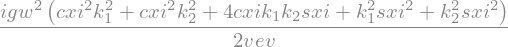

In [ ]:
extract_lorentz_coefficients_vertex_SVV(
    UFOModel.find_vertices_involving(['H','W+','W-'], number_particles=3)[0],
    ufo_model=UFOModel
)

In [17]:
triangle_fvv = construct_triangle_diagram_FVV(
    loop_fermion='N1',
    vector1='W+',
    vector2='W-',
    external_scalars=['H'],
    external_fermions=['mu-', 'ta+'],
    ufo_model=UFOModel
)
print(triangle_fvv)

External scalar: H
External fermions: ['mu-', 'ta+']
Loop fermion: N1
Vectors in loop: W+, W-
Coefficient vertex SVV: 
 I*gw**2*(cxi**2*k1**2 + cxi**2*k2**2 + 4*cxi*k1*k2*sxi + k1**2*sxi**2 + k2**2*sxi**2)/(2*vev)
Coefficient vertex FaVV: 
 {'ProjM': sqrt(2)*I*KL1x2*cxi*gw/2, 'ProjP': -sqrt(2)*I*KR1x2*gw*sxi/2}
Coefficient vertex FbVV: 
 {'ProjM': sqrt(2)*I*KL1x3*cxi*gw/2, 'ProjP': -sqrt(2)*I*KR1x3*gw*sxi/2}
TriangleFVV(VertexSVV(I*gw**2*(cxi**2*k1**2 + cxi**2*k2**2 + 4*cxi*k1*k2*sxi + k1**2*sxi**2 + k2**2*sxi**2)/(2*vev)), VertexVFF(-sqrt(2)*I*KR1x2*gw*sxi/2,sqrt(2)*I*KL1x2*cxi*gw/2), {self.v3!r},{self.masas!r})


In [18]:
from LFVXD.PaVe2 import D as D
from LFVXD.PaVe2 import pave_descomposition, Δe

In [19]:
AL_NiWW = triangle_fvv.AL().subs(D,4)

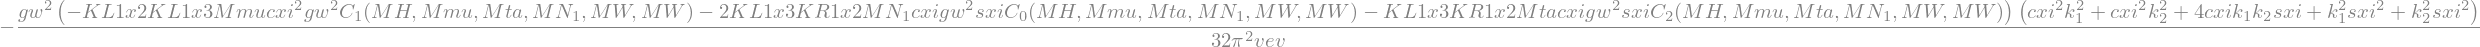

In [20]:
AL_NiWW

In [21]:
DivL_N1WW = pave_descomposition(AL_NiWW).expand().collect(Δe, evaluate=False)#[Δe].simplify()*Δe

In [22]:
DivL_N1WW.keys()

dict_keys([1])

In [23]:
AR_NiWW = triangle_fvv.AR().subs(D,4)

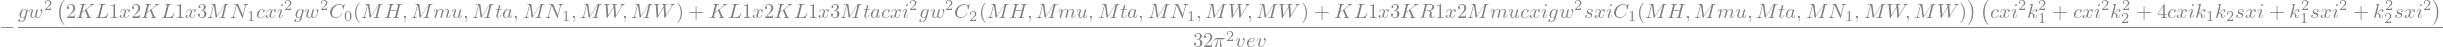

In [ ]:
AR_NiWW

### Triangles FVS and FSV

In [25]:
list(map(
    lambda x:x.particles,
    UFOModel.find_vertices_involving(['H','W+'], number_particles=3)
))

[[W__plus__, GL__minus__, H],
 [W__plus__, H, HM2],
 [W__minus__, W__plus__, H],
 [W2__minus__, W__plus__, H]]

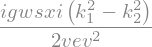

In [ ]:
extract_lorentz_coefficients_vertex_SVV(
    UFOModel.find_vertices_involving(['H','W+','HM2'], number_particles=3)[0],
    ufo_model=UFOModel
)

In [27]:
from construct_lfvhd_diagrams import construct_triangle_diagram_FVS

In [ ]:
triangle_fvs = construct_triangle_diagram_FVS(
    loop_fermion='N1',
    vector='W+',
    scalar='HM2',
    external_scalars=['H'],
    external_fermions=['mu-', 'ta+'],
    ufo_model=UFOModel
)
print(triangle_fvs)

External scalar: H
External fermions: ['mu-', 'ta+']
Loop fermion: N1
Vector and scalar in loop: W+, HM2
Coefficient vertex SVV: 
 I*gw*sxi*(k1 - k2)*(k1 + k2)/(2*vev**2)
Coefficient vertex FaVV: 
 {'ProjM': sqrt(2)*I*KL1x2*cxi*gw/2, 'ProjP': -sqrt(2)*I*KR1x2*gw*sxi/2}
Coefficient vertex FbVV: 
 {'ProjM': -2*sqrt(2)*I*I25a13*k1*k2/(k1**2*vev - k2**2*vev) + sqrt(2)*I*I27a13*k1**2/(k1**2*vev - k2**2*vev) + sqrt(2)*I*I27a13*k2**2/(k1**2*vev - k2**2*vev), 'ProjP': 2*sqrt(2)*I*I26a13*k1*k2/(k1**2*vev - k2**2*vev) - sqrt(2)*I*I28a13*k1**2/(k1**2*vev - k2**2*vev) - sqrt(2)*I*I28a13*k2**2/(k1**2*vev - k2**2*vev)}
TriangleFVV(VertexSVV(I*gw*sxi*(k1 - k2)*(k1 + k2)/(2*vev**2)), VertexVFF(-sqrt(2)*I*KR1x2*gw*sxi/2,sqrt(2)*I*KL1x2*cxi*gw/2), {self.v3!r},{self.masas!r})


In [29]:
list(map(
    lambda x:x.particles,
    UFOModel.find_vertices_involving(['H','HP2'], number_particles=3)
))

[[H, HM2, HP2],
 [GL__minus__, H, HP2],
 [H, HM1, HP2],
 [GR__minus__, H, HP2],
 [W__minus__, H, HP2],
 [W2__minus__, H, HP2]]

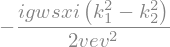

In [ ]:
extract_lorentz_coefficients_vertex_SVV(
    UFOModel.find_vertices_involving(['H','HP2','W-'], number_particles=3)[0],
    ufo_model=UFOModel
)

In [31]:
from construct_lfvhd_diagrams import construct_triangle_diagram_FSV

In [ ]:
triangle_fsv = construct_triangle_diagram_FSV(
    loop_fermion='N1',
    scalar='HP2',
    vector='W-',
    external_scalars=['H'],
    external_fermions=['mu-', 'ta+'],
    ufo_model=UFOModel
)
print(triangle_fsv)

External scalar: H
External fermions: ['mu-', 'ta+']
Loop fermion: N1
Scalar and vector in loop: HP2, W-
Coefficient vertex SVV: 
 -I*gw*sxi*(k1 - k2)*(k1 + k2)/(2*vev**2)
Coefficient vertex FaVV: 
 {'ProjM': 2*sqrt(2)*I*I21a12*k1*k2/(k1**2*vev - k2**2*vev) - sqrt(2)*I*I22a12*k1**2/(k1**2*vev - k2**2*vev) - sqrt(2)*I*I22a12*k2**2/(k1**2*vev - k2**2*vev), 'ProjP': sqrt(2)*I*I23a12*k1**2/(k1**2*vev - k2**2*vev) + sqrt(2)*I*I23a12*k2**2/(k1**2*vev - k2**2*vev) - 2*sqrt(2)*I*I24a12*k1*k2/(k1**2*vev - k2**2*vev)}
Coefficient vertex FbVV: 
 {'ProjM': sqrt(2)*I*KL1x3*cxi*gw/2, 'ProjP': -sqrt(2)*I*KR1x3*gw*sxi/2}
TriangleFVV(VertexSVV(-I*gw*sxi*(k1 - k2)*(k1 + k2)/(2*vev**2)), VertexSFF(sqrt(2)*I*I23a12*k1**2/(k1**2*vev - k2**2*vev) + sqrt(2)*I*I23a12*k2**2/(k1**2*vev - k2**2*vev) - 2*sqrt(2)*I*I24a12*k1*k2/(k1**2*vev - k2**2*vev),2*sqrt(2)*I*I21a12*k1*k2/(k1**2*vev - k2**2*vev) - sqrt(2)*I*I22a12*k1**2/(k1**2*vev - k2**2*vev) - sqrt(2)*I*I22a12*k2**2/(k1**2*vev - k2**2*vev)), {self.v3!r},{sel

### Bubble FV

In [15]:
tau = UFOModel.find_particles(['ta+'])[0]
tau

ta__plus__

In [16]:
tau.antiname

'ta-'

In [17]:
from construct_lfvhd_diagrams import construct_triangle_diagram_FV

In [18]:

triangle_fv = construct_triangle_diagram_FV(
    loop_fermion='N1',
    vector='W+',
    external_scalars=['H'],
    external_fermions=['mu-', 'ta+'],
    ufo_model=UFOModel
)
print(triangle_fv)

External scalar: H
External fermions: ['mu-', 'ta+']
Loop fermion: N1
Vector in loop: W+
Coefficient vertex H-ta+-ta-: 
 {'ProjM': -I*yML3x3/vev, 'ProjP': -I*yML3x3/vev}
Coefficient vertex W+-mu--N1: 
 {'ProjM': sqrt(2)*I*KL1x2*cxi*gw/2, 'ProjP': -sqrt(2)*I*KR1x2*gw*sxi/2}
Coefficient vertex W--ta+-N1: 
 {'ProjM': sqrt(2)*I*KL1x3*cxi*gw/2, 'ProjP': -sqrt(2)*I*KR1x3*gw*sxi/2}
BubbleFV(VertexSFF(-I*yML3x3/vev,-I*yML3x3/vev), VertexVFF(-sqrt(2)*I*KR1x2*gw*sxi/2,sqrt(2)*I*KL1x2*cxi*gw/2), {self.v3!r},{self.masas!r})


In [19]:
from LFVXD.PaVe2 import D, Δe
from sympy import factor

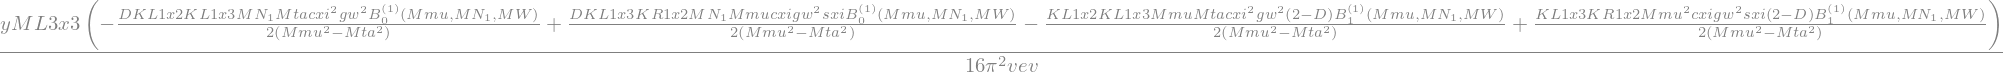

In [20]:
triangle_fv.AL()

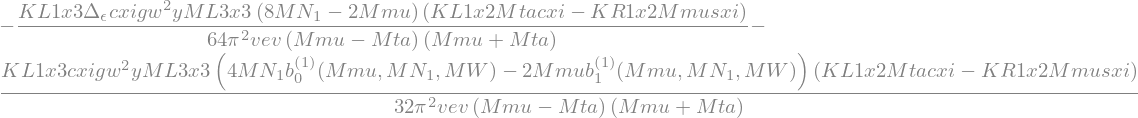

In [21]:
AL_tr_fv = triangle_fv.AL().doit().expand().collect([Δe], factor).subs(D, 4)
AL_tr_fv

In [22]:
from sympy import sympify
from UFOmodel.UFOexplorer import preprocess_expression

In [23]:
len(UFOModel.parameters)

In [24]:
MZ = UFOModel.find_parameters(['MZ'])[0]


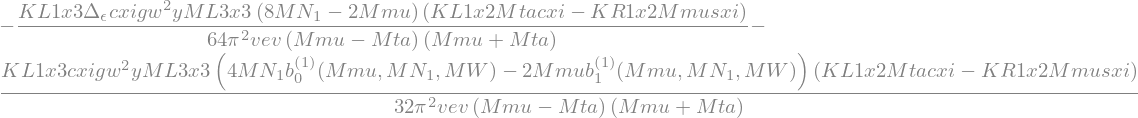

In [30]:
AL_tr_fv = triangle_fv.AL().doit().expand().collect([Δe], factor).subs(D, 4)
AL_tr_fv

In [31]:
AL_tr_fv = AL_tr_fv.subs(sympy_parameters_internal).subs(sympy_parameters_external)

In [32]:
print(AL_tr_fv.free_symbols)

{\Delta_\epsilon, Mmu, vR, VR12, k2, MN1, ee, Mta, MW, VL13, Gf, k1, MZ, VL12}


In [33]:
AL_tr_fv = AL_tr_fv.doit().subs(sympy_mass_external)

In [34]:
print(AL_tr_fv.free_symbols)

{\Delta_\epsilon, Mmu, vR, VR12, k2, MN1, ee, Mta, MW, VL13, Gf, k1, MZ, VL12}


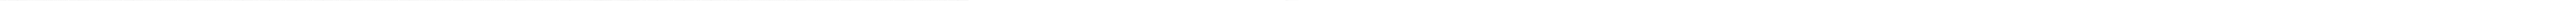

In [35]:
AL_tr_fv.factor()

### Bubble VF

In [11]:
from construct_lfvhd_diagrams import construct_triangle_diagram_VF

In [37]:
triangle_vf = construct_triangle_diagram_VF(
    loop_fermion='N1',
    vector='W+',
    external_scalars=['H'],
    external_fermions=['mu-', 'ta+'],
    ufo_model=UFOModel
)
print(triangle_vf)

External scalar: H
External fermions: ['mu-', 'ta+']
Loop fermion: N1
Vector in loop: W+
Coefficient vertex H-mu--mu+: 
 {'ProjM': -I*yML2x2/vev, 'ProjP': -I*yML2x2/vev}
Coefficient vertex W+-mu--N1: 
 {'ProjM': sqrt(2)*I*KL1x2*cxi*gw/2, 'ProjP': -sqrt(2)*I*KR1x2*gw*sxi/2}
Coefficient vertex W--ta+-N1: 
 {'ProjM': sqrt(2)*I*KL1x3*cxi*gw/2, 'ProjP': -sqrt(2)*I*KR1x3*gw*sxi/2}
BubbleFV(VertexSFF(-I*yML2x2/vev,-I*yML2x2/vev), VertexVFF(-sqrt(2)*I*KR1x2*gw*sxi/2,sqrt(2)*I*KL1x2*cxi*gw/2), {self.v3!r},{self.masas!r})


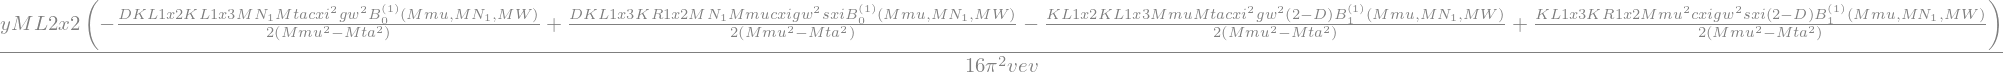

In [38]:
triangle_vf.AL()

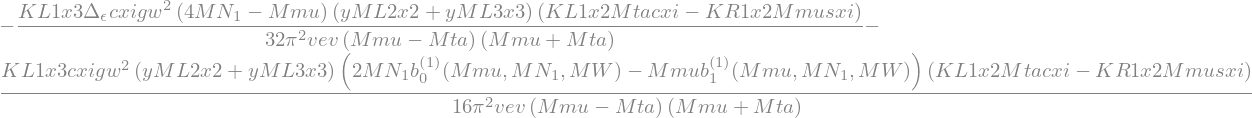

In [39]:
(triangle_vf.AL() + triangle_fv.AL()).subs(D, 4).doit().expand().collect([Δe], factor)

### Bubble FS

In [11]:
from construct_lfvhd_diagrams import construct_triangle_diagram_FS

In [15]:

triangle_fs = construct_triangle_diagram_FS(
    loop_fermion='N1',
    scalar='HP2',
    external_scalars=['H'],
    external_fermions=['mu-', 'ta+'],
    ufo_model=UFOModel
)
print(triangle_fs)

External scalar: H
External fermions: ['mu-', 'ta+']
Loop fermion: N1
Scalar in loop: HP2
Coefficient vertex SFbFb: 
 {'ProjM': -I*yML3x3/vev, 'ProjP': -I*yML3x3/vev}
Coefficient vertex FaVV: 
 {'ProjM': 2*sqrt(2)*I*I21a12*k1*k2/(k1**2*vev - k2**2*vev) - sqrt(2)*I*I22a12*k1**2/(k1**2*vev - k2**2*vev) - sqrt(2)*I*I22a12*k2**2/(k1**2*vev - k2**2*vev), 'ProjP': sqrt(2)*I*I23a12*k1**2/(k1**2*vev - k2**2*vev) + sqrt(2)*I*I23a12*k2**2/(k1**2*vev - k2**2*vev) - 2*sqrt(2)*I*I24a12*k1*k2/(k1**2*vev - k2**2*vev)}
Coefficient vertex FbVV: 
 {'ProjM': -2*sqrt(2)*I*I25a13*k1*k2/(k1**2*vev - k2**2*vev) + sqrt(2)*I*I27a13*k1**2/(k1**2*vev - k2**2*vev) + sqrt(2)*I*I27a13*k2**2/(k1**2*vev - k2**2*vev), 'ProjP': 2*sqrt(2)*I*I26a13*k1*k2/(k1**2*vev - k2**2*vev) - sqrt(2)*I*I28a13*k1**2/(k1**2*vev - k2**2*vev) - sqrt(2)*I*I28a13*k2**2/(k1**2*vev - k2**2*vev)}
BubbleFS(VertexSFF(-I*yML3x3/vev,-I*yML3x3/vev), VertexSFF(sqrt(2)*I*I23a12*k1**2/(k1**2*vev - k2**2*vev) + sqrt(2)*I*I23a12*k2**2/(k1**2*vev - k2**

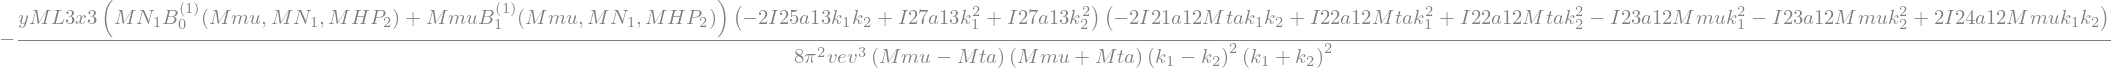

In [19]:
triangle_fs.AL().factor()

### Bubble SF

In [40]:
from construct_lfvhd_diagrams import construct_triangle_diagram_SF

In [41]:

triangle_sf = construct_triangle_diagram_SF(
    loop_fermion='N1',
    scalar='HP2',
    external_scalars=['H'],
    external_fermions=['mu-', 'ta+'],
    ufo_model=UFOModel
)
print(triangle_sf)

External scalar: H
External fermions: ['mu-', 'ta+']
Loop fermion: N1
Scalar in loop: HP2
Coefficient vertex H-mu--mu+: 
 {'ProjM': -I*yML2x2/vev, 'ProjP': -I*yML2x2/vev}
Coefficient vertex HP2-mu--N1: 
 {'ProjM': 2*sqrt(2)*I*I21a12*k1*k2/(k1**2*vev - k2**2*vev) - sqrt(2)*I*I22a12*k1**2/(k1**2*vev - k2**2*vev) - sqrt(2)*I*I22a12*k2**2/(k1**2*vev - k2**2*vev), 'ProjP': sqrt(2)*I*I23a12*k1**2/(k1**2*vev - k2**2*vev) + sqrt(2)*I*I23a12*k2**2/(k1**2*vev - k2**2*vev) - 2*sqrt(2)*I*I24a12*k1*k2/(k1**2*vev - k2**2*vev)}
Coefficient vertex HM2-ta+-N1: 
 {'ProjM': -2*sqrt(2)*I*I25a13*k1*k2/(k1**2*vev - k2**2*vev) + sqrt(2)*I*I27a13*k1**2/(k1**2*vev - k2**2*vev) + sqrt(2)*I*I27a13*k2**2/(k1**2*vev - k2**2*vev), 'ProjP': 2*sqrt(2)*I*I26a13*k1*k2/(k1**2*vev - k2**2*vev) - sqrt(2)*I*I28a13*k1**2/(k1**2*vev - k2**2*vev) - sqrt(2)*I*I28a13*k2**2/(k1**2*vev - k2**2*vev)}
BubbleFS(VertexSFF(-I*yML2x2/vev,-I*yML2x2/vev), VertexSFF(sqrt(2)*I*I23a12*k1**2/(k1**2*vev - k2**2*vev) + sqrt(2)*I*I23a12*k2**2/(

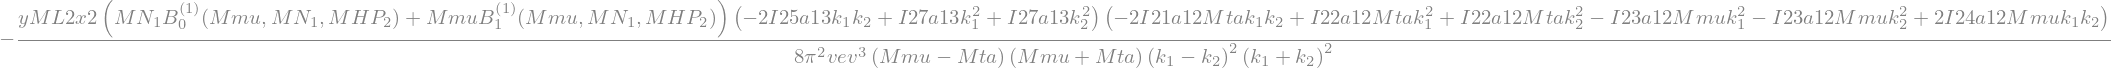

In [42]:
triangle_sf.AL().factor()

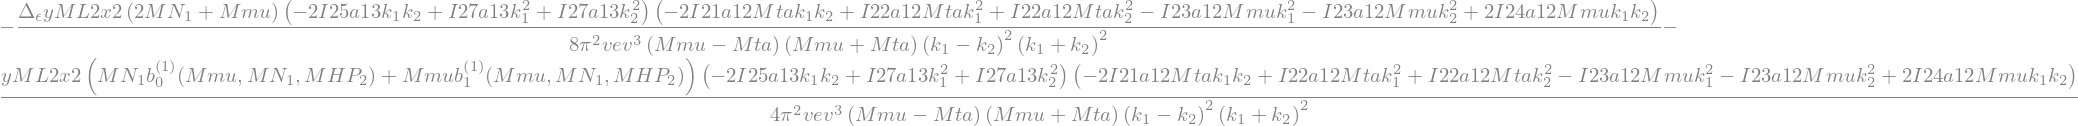

In [43]:
(triangle_sf.AL() + triangle_sf.AL()).subs(D, 4).doit().expand().collect([Δe], factor)


## Two fermions in the loop

### Triangle SFF

In [14]:
from construct_lfvhd_diagrams import construct_triangle_diagram_SFF

In [15]:
triangle_sff = construct_triangle_diagram_SFF(
    loop_fermion1='N1',
    loop_fermion2='N1',
    scalar='HP2',
    external_scalars=['H'],
    external_fermions=['mu-', 'ta+'],
    ufo_model=UFOModel
)
print(triangle_sff)

External scalar: H
External fermions: ['mu-', 'ta+']
Loop fermion: N1, N1
Vector in loop: HP2
Coefficient vertex H-N1-N1: 
 {'ProjM': -I*I13a11/vev - I*I14a11/vev, 'ProjP': -I*I15a11/vev - I*I16a11/vev}
Coefficient vertex HP2-mu--N1: 
 {'ProjM': 2*sqrt(2)*I*I21a12*k1*k2/(k1**2*vev - k2**2*vev) - sqrt(2)*I*I22a12*k1**2/(k1**2*vev - k2**2*vev) - sqrt(2)*I*I22a12*k2**2/(k1**2*vev - k2**2*vev), 'ProjP': sqrt(2)*I*I23a12*k1**2/(k1**2*vev - k2**2*vev) + sqrt(2)*I*I23a12*k2**2/(k1**2*vev - k2**2*vev) - 2*sqrt(2)*I*I24a12*k1*k2/(k1**2*vev - k2**2*vev)}
Coefficient vertex HM2-ta+-N1: 
 {'ProjM': -2*sqrt(2)*I*I25a13*k1*k2/(k1**2*vev - k2**2*vev) + sqrt(2)*I*I27a13*k1**2/(k1**2*vev - k2**2*vev) + sqrt(2)*I*I27a13*k2**2/(k1**2*vev - k2**2*vev), 'ProjP': 2*sqrt(2)*I*I26a13*k1*k2/(k1**2*vev - k2**2*vev) - sqrt(2)*I*I28a13*k1**2/(k1**2*vev - k2**2*vev) - sqrt(2)*I*I28a13*k2**2/(k1**2*vev - k2**2*vev)}
TriangleSFF(VertexSFF(-I*I15a11/vev - I*I16a11/vev,-I*I13a11/vev - I*I14a11/vev), VertexSFF(sqrt(2)*

In [16]:
print(triangle_sff.AL().factor())

-(-2*I25a13*k1*k2 + I27a13*k1**2 + I27a13*k2**2)*(-2*I13a11*I21a12*MN1**2*k1*k2*C0(MH, Mmu, Mta, MHP2, MN1, MN1) - 2*I13a11*I21a12*MN1*Mmu*k1*k2*C0(MH, Mmu, Mta, MHP2, MN1, MN1) + 2*I13a11*I21a12*MN1*Mmu*k1*k2*C1(MH, Mmu, Mta, MHP2, MN1, MN1) + I13a11*I22a12*MN1**2*k1**2*C0(MH, Mmu, Mta, MHP2, MN1, MN1) + I13a11*I22a12*MN1**2*k2**2*C0(MH, Mmu, Mta, MHP2, MN1, MN1) + I13a11*I22a12*MN1*Mmu*k1**2*C0(MH, Mmu, Mta, MHP2, MN1, MN1) - I13a11*I22a12*MN1*Mmu*k1**2*C1(MH, Mmu, Mta, MHP2, MN1, MN1) + I13a11*I22a12*MN1*Mmu*k2**2*C0(MH, Mmu, Mta, MHP2, MN1, MN1) - I13a11*I22a12*MN1*Mmu*k2**2*C1(MH, Mmu, Mta, MHP2, MN1, MN1) - I13a11*I23a12*MN1*Mta*k1**2*C0(MH, Mmu, Mta, MHP2, MN1, MN1) - I13a11*I23a12*MN1*Mta*k1**2*C2(MH, Mmu, Mta, MHP2, MN1, MN1) - I13a11*I23a12*MN1*Mta*k2**2*C0(MH, Mmu, Mta, MHP2, MN1, MN1) - I13a11*I23a12*MN1*Mta*k2**2*C2(MH, Mmu, Mta, MHP2, MN1, MN1) - I13a11*I23a12*Mmu*Mta*k1**2*C0(MH, Mmu, Mta, MHP2, MN1, MN1) + I13a11*I23a12*Mmu*Mta*k1**2*C1(MH, Mmu, Mta, MHP2, MN1, MN1) - I

## Triangle FVV

In [17]:
from construct_lfvhd_diagrams import construct_triangle_diagram_VFF

In [18]:
triangle_vff = construct_triangle_diagram_VFF(
    loop_fermion1='N1',
    loop_fermion2='N1',
    vector='W+',
    external_scalars=['H'],
    external_fermions=['mu-', 'ta+'],
    ufo_model=UFOModel
)
print(triangle_vff)

External scalar: H
External fermions: ['mu-', 'ta+']
Loop fermion: N1, N1
Vector in loop: W+
Coefficient vertex H-N1-N1: 
 {'ProjM': -I*I13a11/vev - I*I14a11/vev, 'ProjP': -I*I15a11/vev - I*I16a11/vev}
Coefficient vertex W+-mu--N1: 
 {'ProjM': sqrt(2)*I*KL1x2*cxi*gw/2, 'ProjP': -sqrt(2)*I*KR1x2*gw*sxi/2}
Coefficient vertex W--ta+-N1: 
 {'ProjM': sqrt(2)*I*KL1x3*cxi*gw/2, 'ProjP': -sqrt(2)*I*KR1x3*gw*sxi/2}
TriangleVFF(VertexSFF(-I*I15a11/vev - I*I16a11/vev,-I*I13a11/vev - I*I14a11/vev), VertexVFF(-sqrt(2)*I*KR1x2*gw*sxi/2,sqrt(2)*I*KL1x2*cxi*gw/2), {self.v3!r},{self.masas!r})


In [19]:
print(triangle_vff.AL().factor())

-KL1x3*cxi*gw**2*(-D*I13a11*KL1x2*MN1*Mmu*cxi*C1(MH, Mmu, Mta, MW, MN1, MN1) + D*I13a11*KL1x2*MW**2*cxi*C0(MH, Mmu, Mta, MW, MN1, MN1) - D*I13a11*KL1x2*Mmu**2*cxi*C1(MH, Mmu, Mta, MW, MN1, MN1) + D*I13a11*KL1x2*Mta**2*cxi*C2(MH, Mmu, Mta, MW, MN1, MN1) + D*I13a11*KL1x2*cxi*B12_0(MH, MN1, MN1) - D*I13a11*KR1x2*MN1*Mta*sxi*C2(MH, Mmu, Mta, MW, MN1, MN1) - D*I14a11*KL1x2*MN1*Mmu*cxi*C1(MH, Mmu, Mta, MW, MN1, MN1) + D*I14a11*KL1x2*MW**2*cxi*C0(MH, Mmu, Mta, MW, MN1, MN1) - D*I14a11*KL1x2*Mmu**2*cxi*C1(MH, Mmu, Mta, MW, MN1, MN1) + D*I14a11*KL1x2*Mta**2*cxi*C2(MH, Mmu, Mta, MW, MN1, MN1) + D*I14a11*KL1x2*cxi*B12_0(MH, MN1, MN1) - D*I14a11*KR1x2*MN1*Mta*sxi*C2(MH, Mmu, Mta, MW, MN1, MN1) + D*I15a11*KL1x2*MN1**2*cxi*C0(MH, Mmu, Mta, MW, MN1, MN1) + D*I15a11*KL1x2*MN1*Mmu*cxi*C0(MH, Mmu, Mta, MW, MN1, MN1) - D*I15a11*KL1x2*MN1*Mmu*cxi*C1(MH, Mmu, Mta, MW, MN1, MN1) - D*I15a11*KR1x2*MN1*Mta*sxi*C0(MH, Mmu, Mta, MW, MN1, MN1) - D*I15a11*KR1x2*MN1*Mta*sxi*C2(MH, Mmu, Mta, MW, MN1, MN1) - D*I15a11

In [2]:
import numpy as np
import mpmath as mp

M_R_np = np.array(
    [
        [1,0,0],
        [0,2,0],
        [0,0,3]
    ]
)

M_R_mp = mp.matrix(M_R_np.tolist())
M_R_mp

matrix(
[['1.0', '0.0', '0.0'],
 ['0.0', '2.0', '0.0'],
 ['0.0', '0.0', '3.0']])